<a href="https://colab.research.google.com/github/Shubhangidharmik/Yes-Bank-Stock-Closing-Prices/blob/main/yes_bank_stock_closing_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Yes Bank Stock Closing Prices Prediction Analysis

**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/self practice/Yes bank capstone project 2/Copy of data_YesBank_StockPrices.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.shape

(185, 5)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

# **Data Cleaning**

In [ ]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
len(df[df.duplicated()])

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**Outliers**

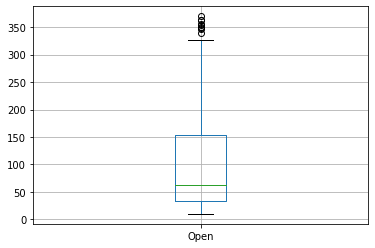

In [ ]:
df.boxplot('Open')

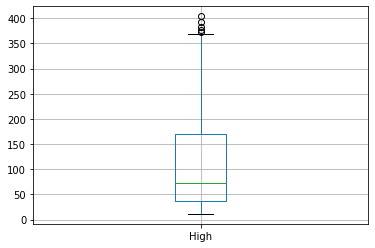

In [ ]:
df.boxplot('High');

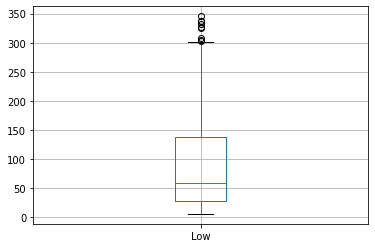

In [ ]:
df.boxplot('Low');

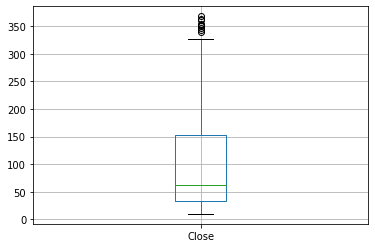

In [ ]:
df.boxplot('Close');

# **Exploratory Data Analysis**

**Dependent Variable**

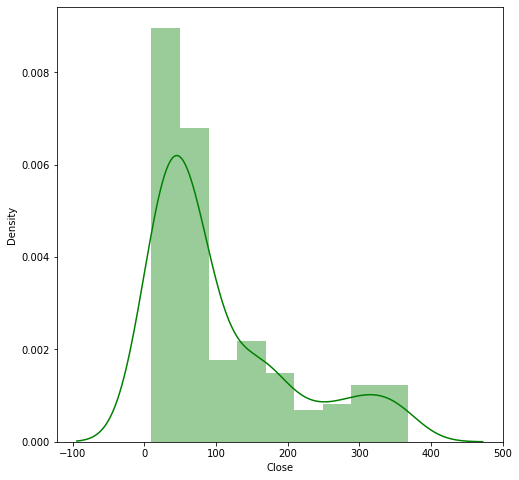

In [ ]:
# Dependent variable 'close'
plt.figure(figsize=(8,8))
sns.distplot(df['Close'], color='g')

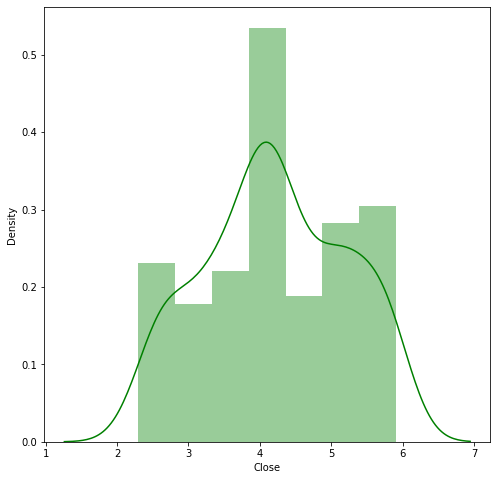

In [ ]:
# For Normal Distribution
plt.figure(figsize=(8,8))
sns.distplot(np.log(df['Close']), color='g')

**Independent Variable**

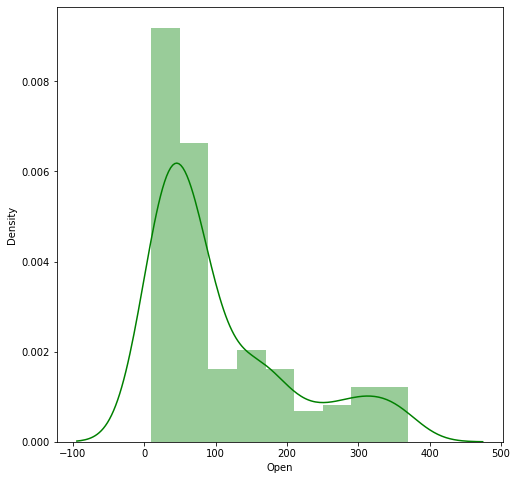

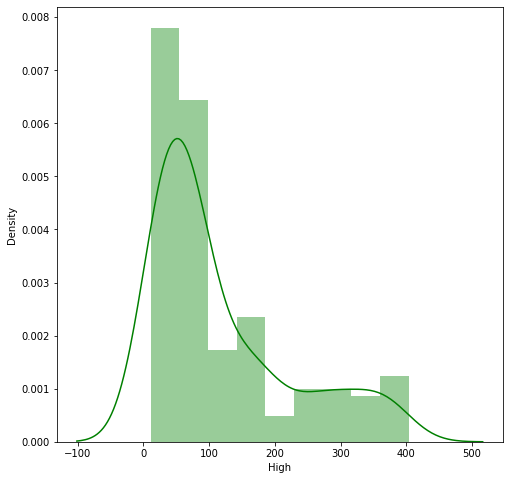

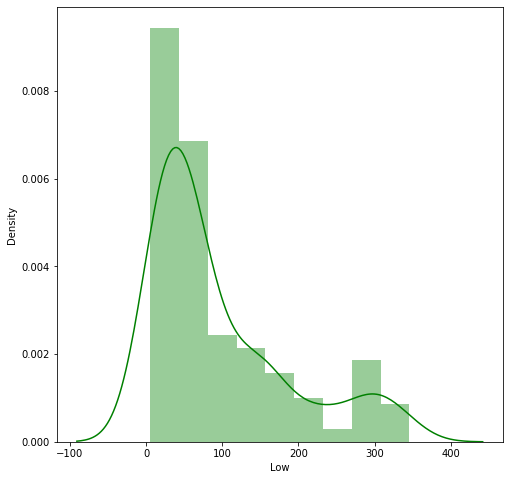

In [ ]:
# Independent variables
plt.figure(figsize=(8,8))
sns.distplot(df['Open'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['High'], color='g')

plt.figure(figsize=(8,8))
sns.distplot(df['Low'], color='g')

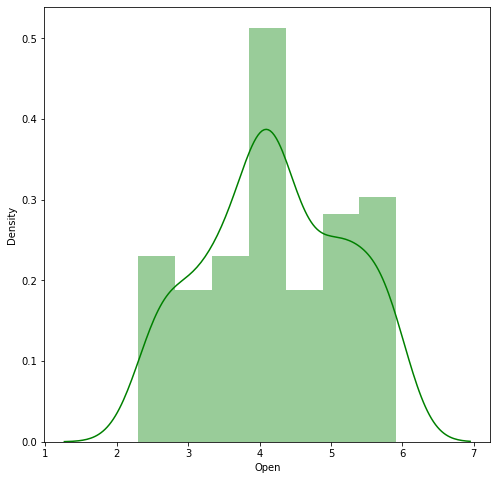

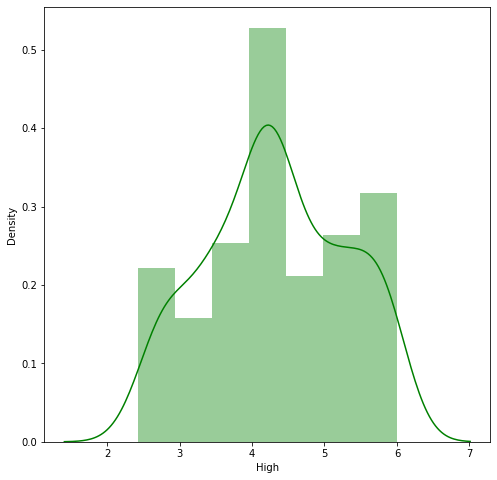

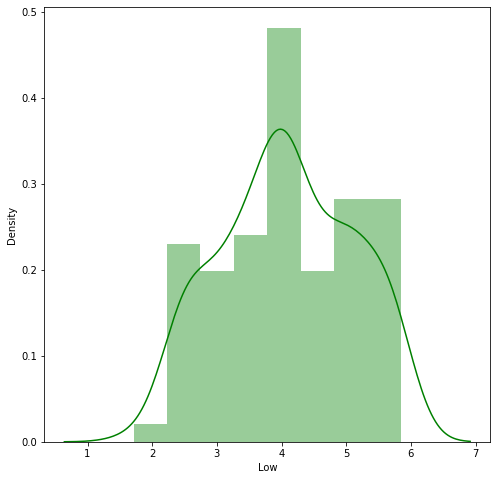

In [ ]:
# For Normal Distribution
plt.figure(figsize=(8,8))
sns.distplot(np.log(df['Open']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log(df['High']), color='g')

plt.figure(figsize=(8,8))
sns.distplot(np.log(df['Low']), color='g')

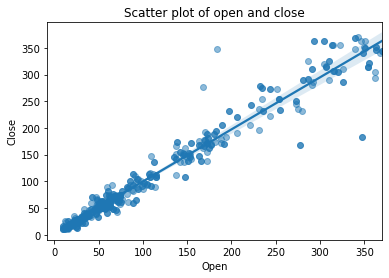

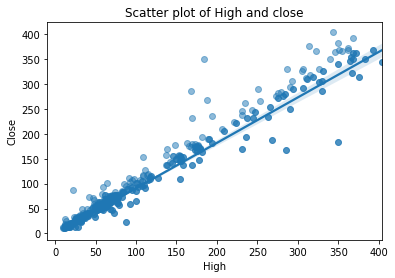

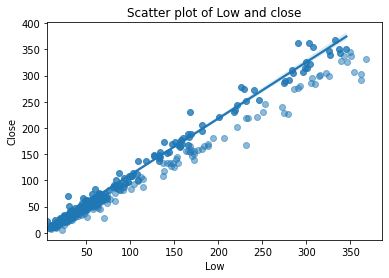

In [ ]:
# To find relational between dependent variable and independent variable

plt.scatter(df['Close'], df['Open'], alpha=0.5)
plt.title('Scatter plot of open and close')
plt.xlabel('Open')
plt.ylabel('Close')
sns.regplot(x="Open", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['High'], alpha=0.5)
plt.title('Scatter plot of High and close')
plt.xlabel('High')
plt.ylabel('Close')
sns.regplot(x="High", y="Close", data=df)
plt.show()

plt.scatter(df['Close'], df['Low'], alpha=0.5)
plt.title('Scatter plot of Low and close')
plt.xlabel('Low')
plt.ylabel('Close')
sns.regplot(x="Low", y="Close", data=df)
plt.show()

# **Correlation**

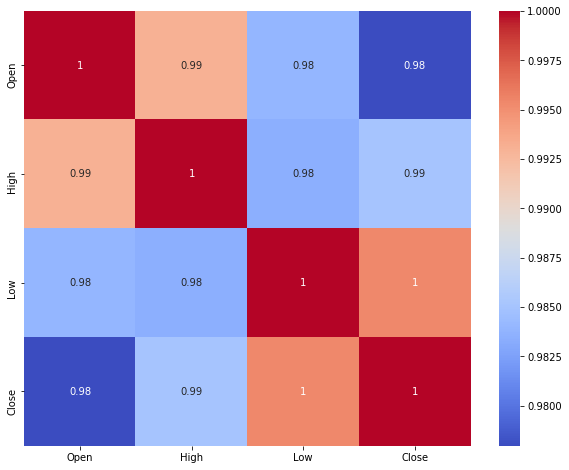

In [ ]:
## Correlation
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137
